In [4]:
install.packages(c("kknn", "GGally"))
library(tidyverse)
library(repr)
library(tidymodels)
library(rvest)
library(GGally)
library(kknn)
options(repr.matrix.max.rows = 8)

also installing the dependencies ‘labelled’, ‘broom.helpers’, ‘ggplot2’, ‘ggstats’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
✔ purrr   1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales

In [8]:
data <- url <- "https://raw.githubusercontent.com/RachelX6/DSCI100-Group-Project/main/winequality-white.csv"
wine <- read_delim(url, delim = ";")
colnames(wine) <- c("fixed_acidity", # Adjusting column names for cleanliness.
              "volatile_acidity",
              "citric_acid",
              "residual_sugar",
              "chlorides",
              "free_sulfur_dioxide",
              "total_sulfur_dioxide",
              "density",
              "pH",
              "sulphates",
              "alcohol",
              "quality")

wine <- wine |>      # Changing the column "quality" into factor
    mutate(quality = as_factor(quality))
wine

Rows: 4898 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
6.6,0.32,0.36,8.0,0.047,57,168,0.99490,3.15,0.46,9.6,5
6.5,0.24,0.19,1.2,0.041,30,111,0.99254,2.99,0.46,9.4,6
5.5,0.29,0.30,1.1,0.022,20,110,0.98869,3.34,0.38,12.8,7
6.0,0.21,0.38,0.8,0.020,22,98,0.98941,3.26,0.32,11.8,6


In [10]:
?upSample

downSample {caret},R Documentation
x,a matrix or data frame of predictor variables
y,a factor variable with the class memberships
list,"should the function return list(x, y) or bind x and y together? If FALSE, the output will be coerced to a data frame."
yname,"if list = FALSE, a label for the class column"


In [14]:
new.wine <- downSample(wine, wine$quality)
new.wine

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
5.8,0.240,0.44,3.5,0.029,5,109,0.99130,3.53,0.43,11.7,3,3
8.5,0.260,0.21,16.2,0.074,41,197,0.99800,3.02,0.50,9.8,3,3
4.2,0.215,0.23,5.1,0.041,64,157,0.99688,3.42,0.44,8.0,3,3
10.3,0.170,0.47,1.4,0.037,5,33,0.99390,2.89,0.28,9.6,3,3
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
7.1,0.26,0.49,2.2,0.032,31,113,0.99030,3.37,0.42,12.9,9,9
6.6,0.36,0.29,1.6,0.021,24,85,0.98965,3.41,0.61,12.4,9,9
7.4,0.24,0.36,2.0,0.031,27,139,0.99055,3.28,0.48,12.5,9,9
6.9,0.36,0.34,4.2,0.018,57,119,0.98980,3.28,0.36,12.7,9,9


In [17]:
wine_qual_counts <- new.wine |>
            group_by(quality) |>
            summarize(count = n())
wine_qual_counts

quality,count
<fct>,<int>
3,5
4,5
5,5
6,5
7,5
8,5
9,5


In [28]:
up.wine <- upSample(wine[,-12], wine$quality, yname = "quality")
up.wine

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
8.5,0.26,0.21,16.2,0.074,41,197,0.9980,3.02,0.50,9.8,3
5.8,0.24,0.44,3.5,0.029,5,109,0.9913,3.53,0.43,11.7,3
9.1,0.59,0.38,1.6,0.066,34,182,0.9968,3.23,0.38,8.5,3
7.1,0.32,0.32,11.0,0.038,16,66,0.9937,3.24,0.40,11.5,3
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
7.4,0.24,0.36,2.0,0.031,27,139,0.99055,3.28,0.48,12.5,9
7.4,0.24,0.36,2.0,0.031,27,139,0.99055,3.28,0.48,12.5,9
7.1,0.26,0.49,2.2,0.032,31,113,0.99030,3.37,0.42,12.9,9
6.9,0.36,0.34,4.2,0.018,57,119,0.98980,3.28,0.36,12.7,9


In [21]:
wine_qual_counts <- up.wine |>
            group_by(quality) |>
            summarize(count = n())
wine_qual_counts

quality,count
<fct>,<int>
3,2198
4,2198
5,2198
6,2198
7,2198
8,2198
9,2198


In [39]:
class(up.wine)

[1] "data.frame"

In [29]:
wine_samp_m <- up.wine |>
    group_by(quality) |>
    summarize(across(everything(), list(mean)))
wine_samp_m

quality,fixed_acidity_1,volatile_acidity_1,citric_acid_1,residual_sugar_1,chlorides_1,free_sulfur_dioxide_1,total_sulfur_dioxide_1,density_1,pH_1,sulphates_1,alcohol_1
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,7.577116,0.3367129,0.3378617,6.207780,0.05560464,53.36306,170.2934,0.9948204,3.187056,0.4711738,10.325842
4,7.137807,0.3833599,0.3047589,4.572998,0.05026706,23.54891,125.8424,0.9942295,3.182197,0.4785259,10.173044
5,6.939809,0.3002525,0.3355050,7.348066,0.05112602,36.28185,150.8612,0.9952484,3.169022,0.4798954,9.825817
6,6.837671,0.2605641,0.3380255,6.441606,0.04521747,35.65059,137.0473,0.9939613,3.188599,0.4911056,10.575372
7,6.724067,0.2633371,0.3264968,5.300227,0.03838126,34.13353,125.4502,0.9924961,3.211865,0.5050091,11.355353
8,6.654004,0.2783235,0.3323021,5.635282,0.03810919,36.00182,125.0441,0.9921885,3.221765,0.4882257,11.670610
9,7.449272,0.2969882,0.3870200,4.206824,0.02760919,32.97862,116.0045,0.9915581,3.306984,0.4678662,12.146906


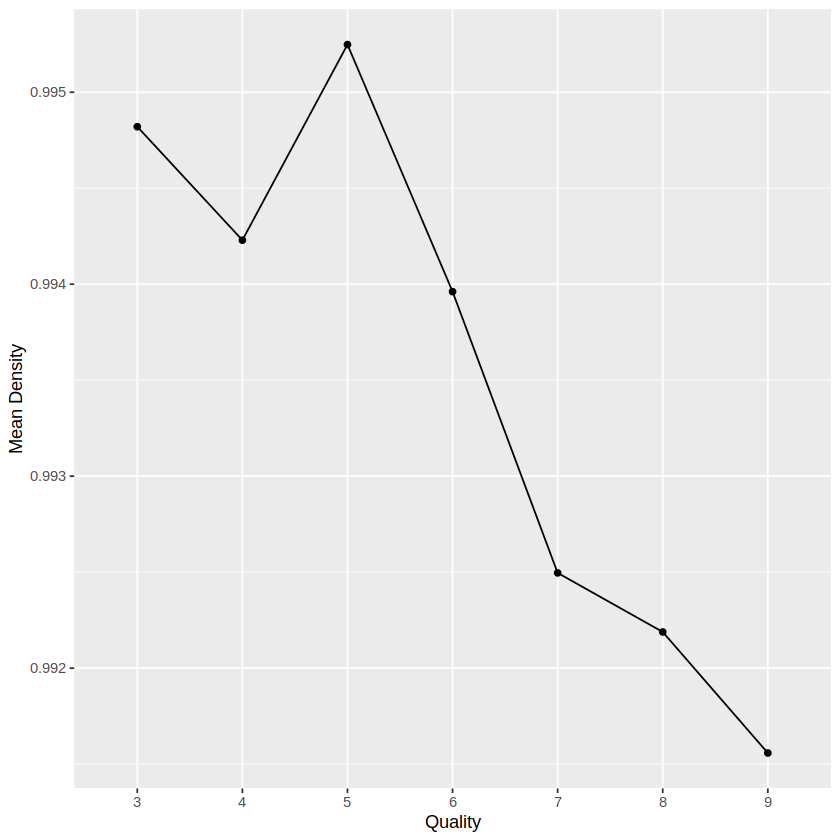

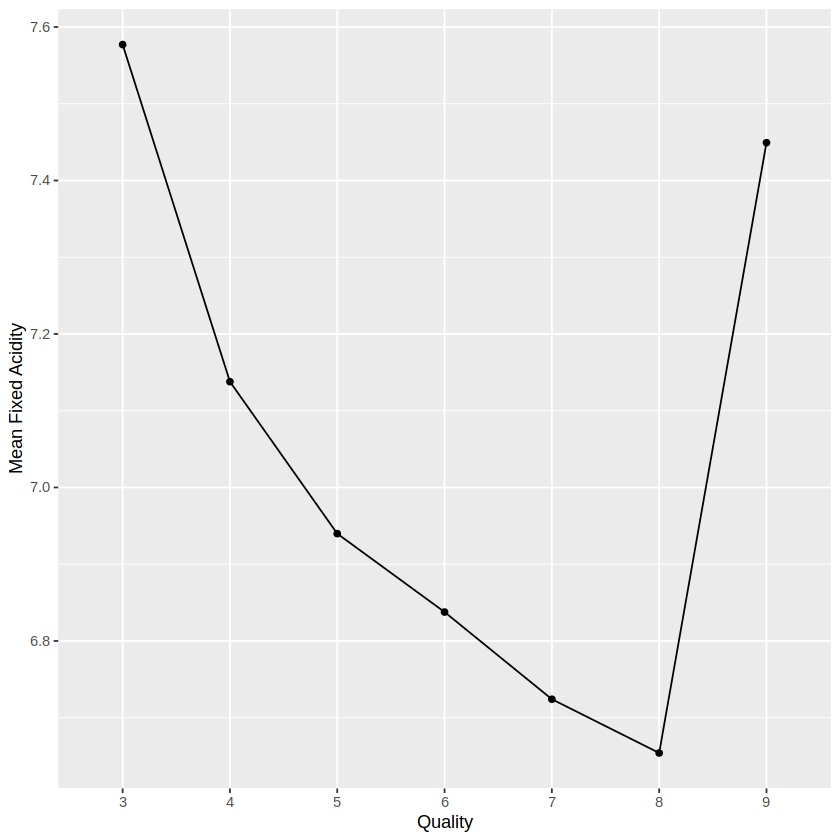

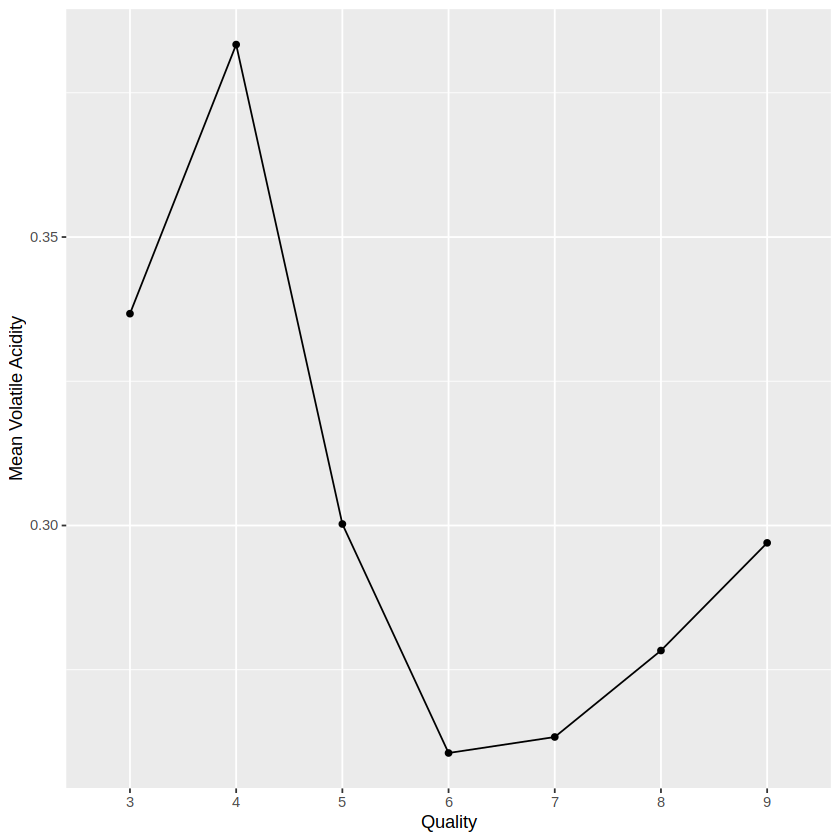

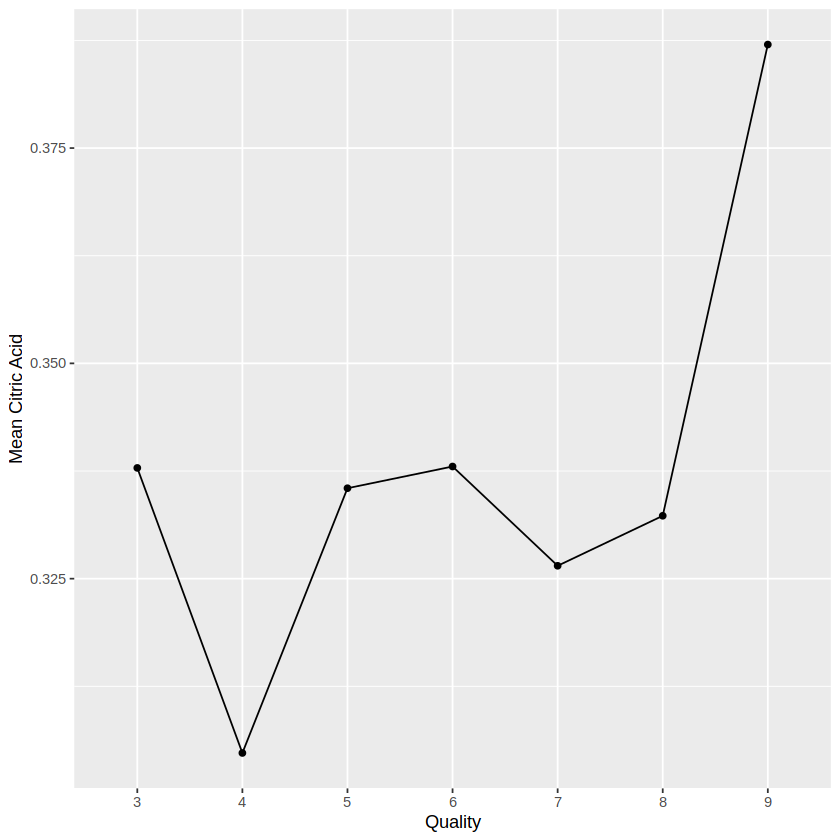

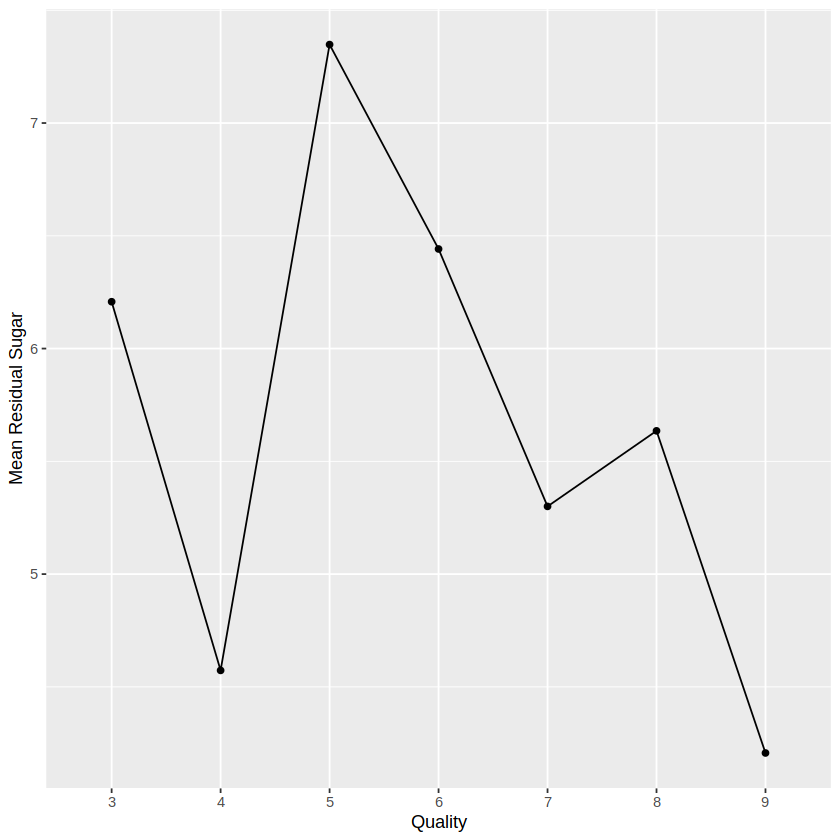

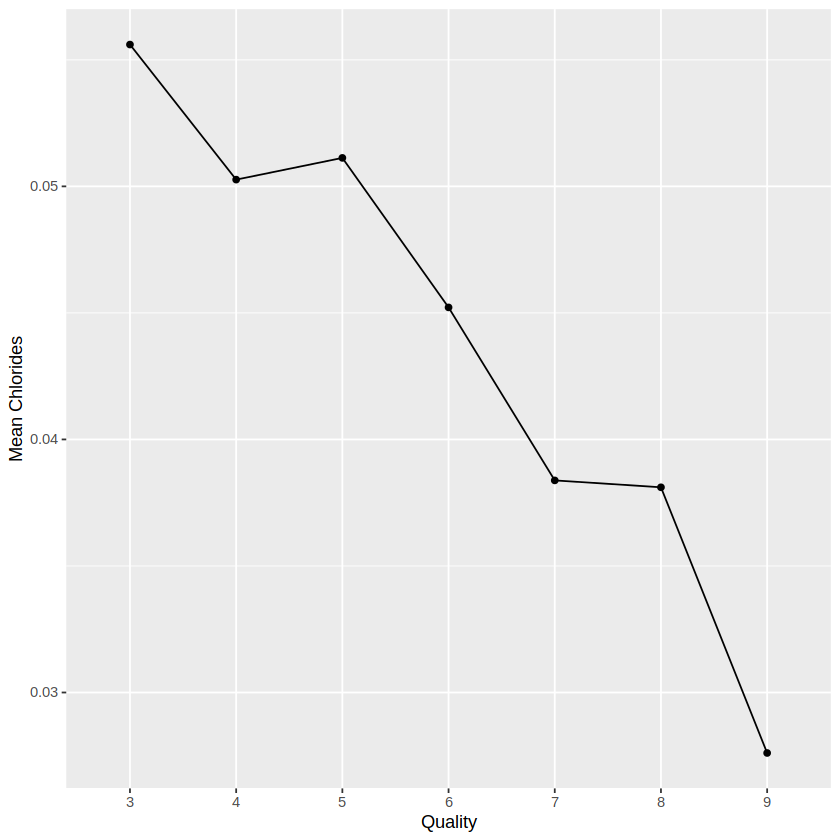

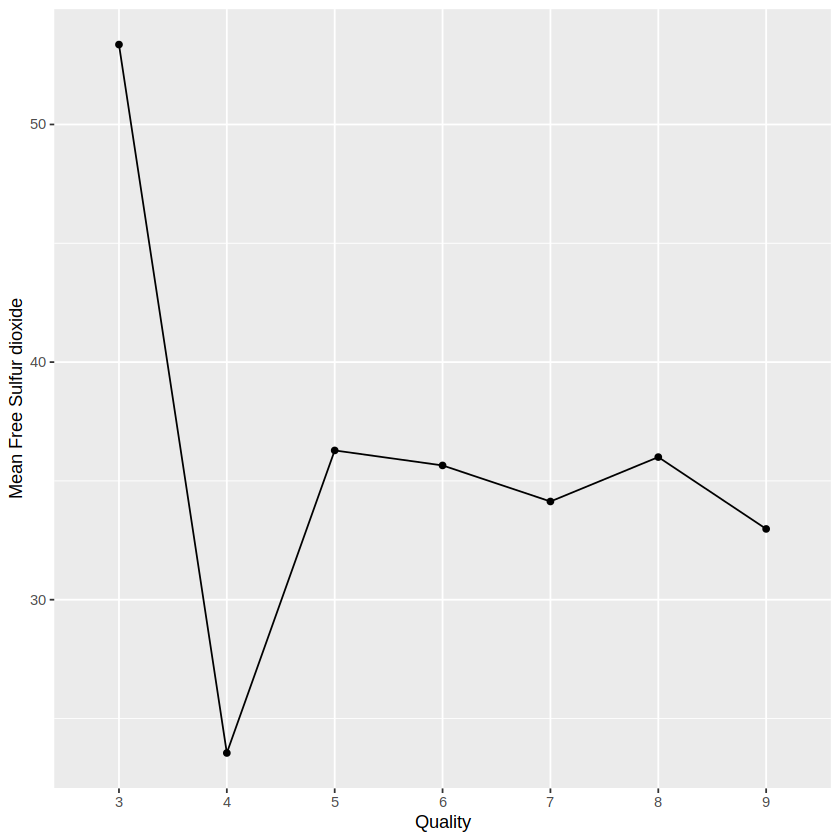

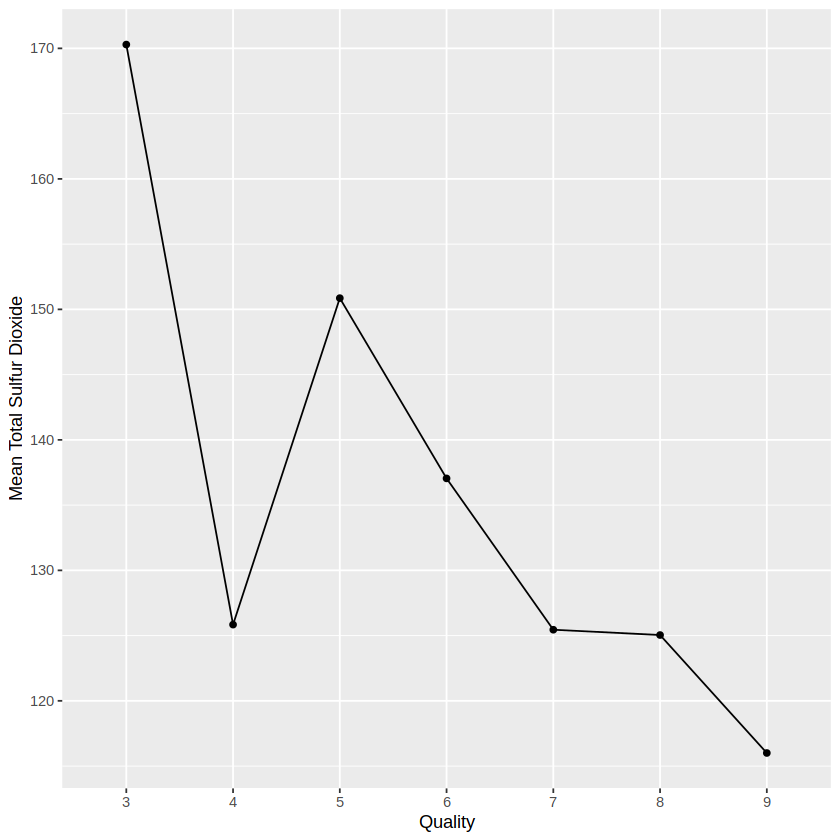

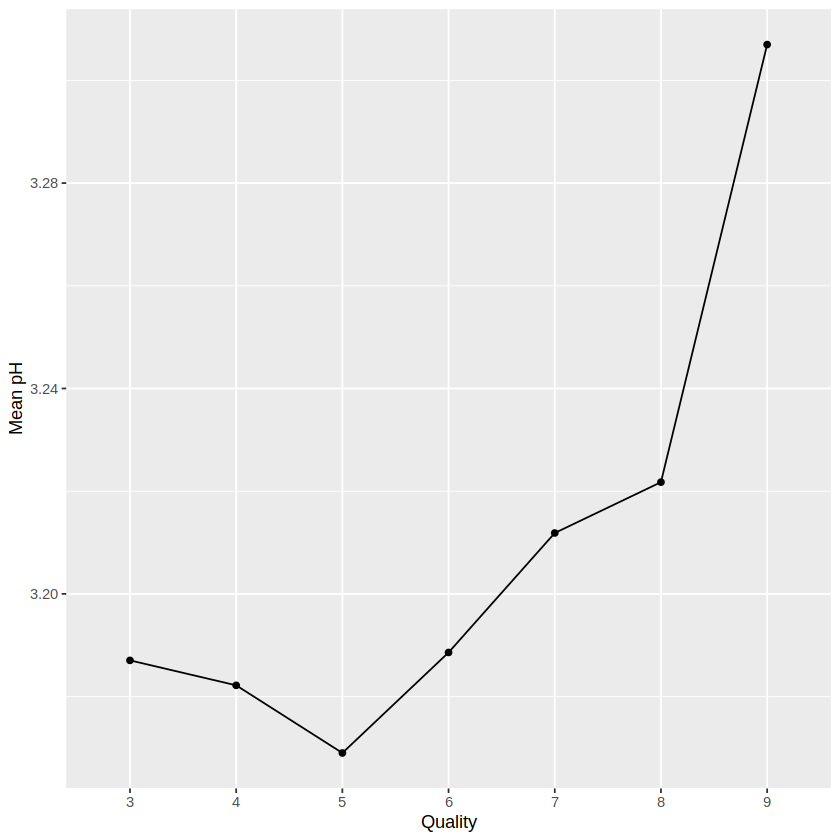

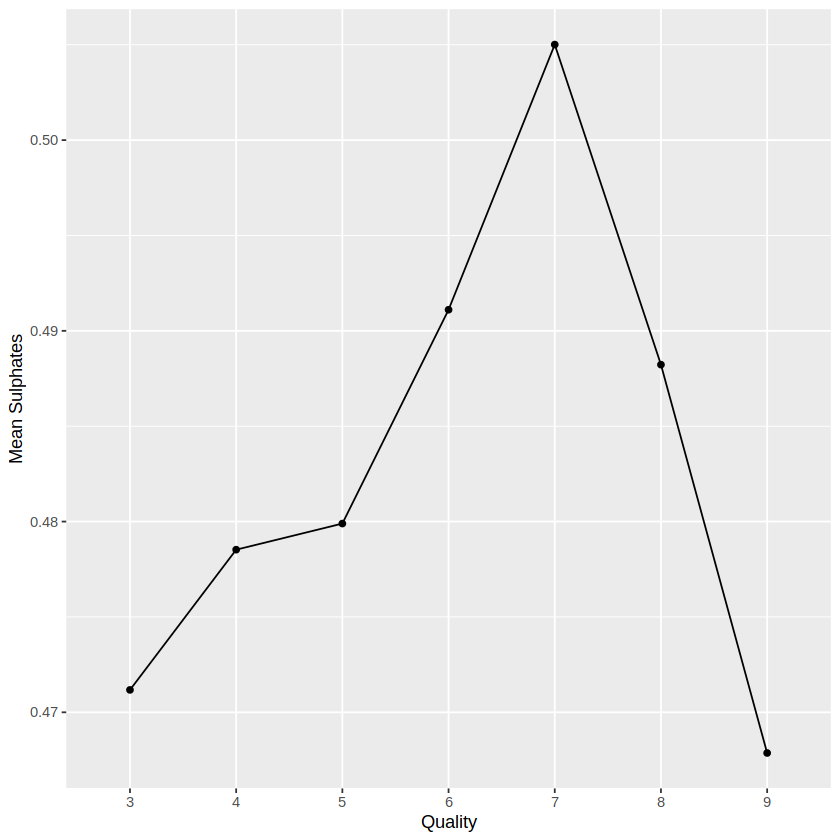

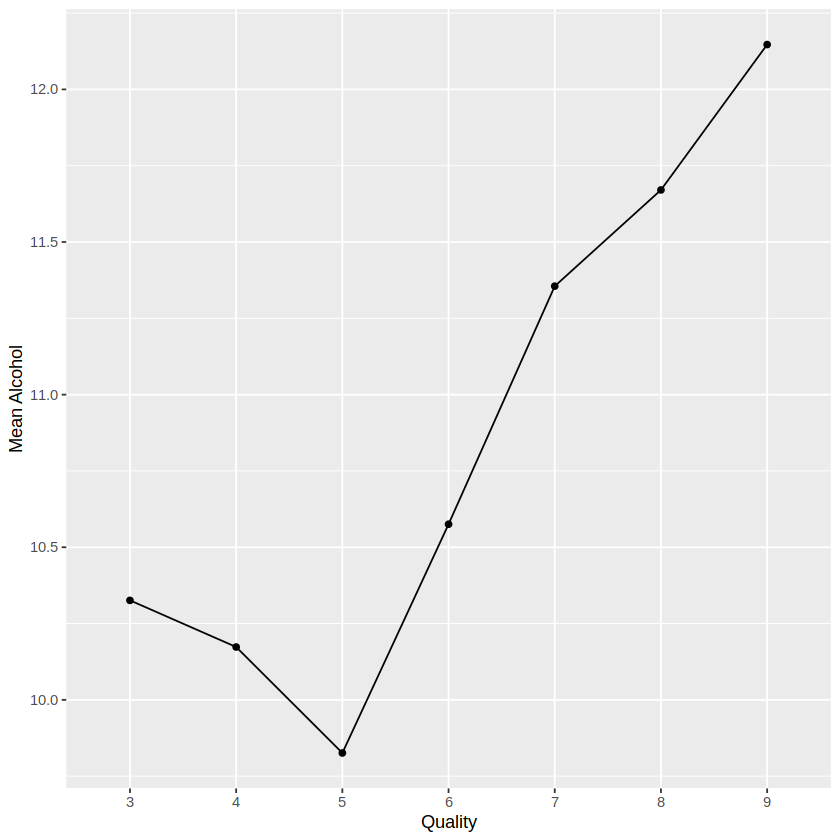

In [37]:
ggplot(wine_samp_m, aes(x= quality, y = density_1)) +
    geom_point() +
    geom_line(aes(group = 1)) +
    labs(y = "Mean Density", x = "Quality")
ggplot(wine_samp_m, aes(x= quality, y = fixed_acidity_1)) +
    geom_point() +
    geom_line(aes(group = 1)) +
    labs(y = "Mean Fixed Acidity", x = "Quality")
ggplot(wine_samp_m, aes(x= quality, y = volatile_acidity_1)) +
    geom_point() +
    geom_line(aes(group = 1)) +
    labs(y = "Mean Volatile Acidity", x = "Quality")
ggplot(wine_samp_m, aes(x= quality, y = citric_acid_1)) +
    geom_point() +
    geom_line(aes(group = 1)) +
    labs(y = "Mean Citric Acid", x = "Quality")
ggplot(wine_samp_m, aes(x= quality, y = residual_sugar_1)) +
    geom_point() +
    geom_line(aes(group = 1)) +
    labs(y = "Mean Residual Sugar", x = "Quality")
ggplot(wine_samp_m, aes(x= quality, y = chlorides_1)) +
    geom_point() +
    geom_line(aes(group = 1)) +
    labs(y = "Mean Chlorides", x = "Quality")
ggplot(wine_samp_m, aes(x= quality, y = free_sulfur_dioxide_1)) +
    geom_point() +
    geom_line(aes(group = 1)) +
    labs(y = "Mean Free Sulfur dioxide", x = "Quality")
ggplot(wine_samp_m, aes(x= quality, y = total_sulfur_dioxide_1)) +
    geom_point() +
    geom_line(aes(group = 1)) +
    labs(y = "Mean Total Sulfur Dioxide", x = "Quality")
ggplot(wine_samp_m, aes(x= quality, y = pH_1)) +
    geom_point() +
    geom_line(aes(group = 1)) +
    labs(y = "Mean pH", x = "Quality")
ggplot(wine_samp_m, aes(x= quality, y = sulphates_1)) +
    geom_point() +
    geom_line(aes(group = 1)) +
    labs(y = "Mean Sulphates", x = "Quality")
ggplot(wine_samp_m, aes(x = quality, y = alcohol_1)) +
    geom_point() +
    geom_line(aes(group = 1)) +
    labs(y = "Mean Alcohol", x = "Quality")

In [45]:
up.wine <- as_tibble(up.wine)
names <- colnames(up.wine |> select(-quality))


In [46]:
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

# create a 5-fold cross-validation object
wine_vfold <- vfold_cv(up.wine, v = 5, strata = quality)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("quality", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        wine_recipe <- recipe(as.formula(model_string), 
                                data = up.wine) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() |>
          add_recipe(wine_recipe) |>
          add_model(knn_spec) |>
          tune_grid(resamples = wine_vfold, grid = 10) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}
accuracies

size,model_string,accuracy
<int>,<chr>,<dbl>
1,quality ~ density,0.5131957
2,quality ~ density+free_sulfur_dioxide,0.8685816
3,quality ~ density+free_sulfur_dioxide+citric_acid,0.9099135
4,quality ~ density+free_sulfur_dioxide+citric_acid+residual_sugar,0.9150497
⋮,⋮,⋮
8,quality ~ density+free_sulfur_dioxide+citric_acid+residual_sugar+sulphates+fixed_acidity+volatile_acidity+alcohol,0.9225236
9,quality ~ density+free_sulfur_dioxide+citric_acid+residual_sugar+sulphates+fixed_acidity+volatile_acidity+alcohol+pH,0.9229818
10,quality ~ density+free_sulfur_dioxide+citric_acid+residual_sugar+sulphates+fixed_acidity+volatile_acidity+alcohol+pH+total_sulfur_dioxide,0.9220707
11,quality ~ density+free_sulfur_dioxide+citric_acid+residual_sugar+sulphates+fixed_acidity+volatile_acidity+alcohol+pH+total_sulfur_dioxide+chlorides,0.9235024


In [47]:
print(accuracies)

# A tibble: 11 × 3
    size model_string                                                   accuracy
   <int> <chr>                                                             <dbl>
 1     1 quality ~ density                                                 0.513
 2     2 quality ~ density+free_sulfur_dioxide                             0.869
 3     3 quality ~ density+free_sulfur_dioxide+citric_acid                 0.910
 4     4 quality ~ density+free_sulfur_dioxide+citric_acid+residual_su…    0.915
 5     5 quality ~ density+free_sulfur_dioxide+citric_acid+residual_su…    0.916
 6     6 quality ~ density+free_sulfur_dioxide+citric_acid+residual_su…    0.919
 7     7 quality ~ density+free_sulfur_dioxide+citric_acid+residual_su…    0.920
 8     8 quality ~ density+free_sulfur_dioxide+citric_acid+residual_su…    0.923
 9     9 quality ~ density+free_sulfur_dioxide+citric_acid+residual_su…    0.923
10    10 quality ~ density+free_sulfur_dioxide+citric_acid+residual_su…    0.922
11    11 